<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

# 1. 
**Загрузить датасет**

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr


%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. 
**Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
df.isnull().sum().sum()

0

# 3. 
**Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

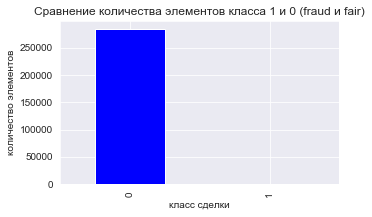

Количество элементов fraud (класс 1)= 492      Количество элементов fair (класс 0)= 284315


In [4]:
df['Class'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Сравнение количества элементов класса 1 и 0 (fraud и fair)')
plt.xlabel('класс сделки')
plt.ylabel('количество элементов')
plt.show()

fraud = df[df['Class'] == 1][['Class', 'Amount']]
fair = df[df['Class'] == 0][['Class', 'Amount']]

print(f'Количество элементов fraud (класс 1)= {len(fraud)}\
      Количество элементов fair (класс 0)= {len(fair)}')


# 4. 
**Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

В обманных операциях использовано 60127.97
В нормальных операциях использовано 25102462.04


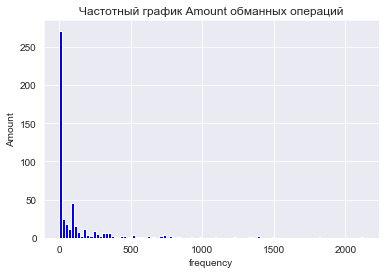

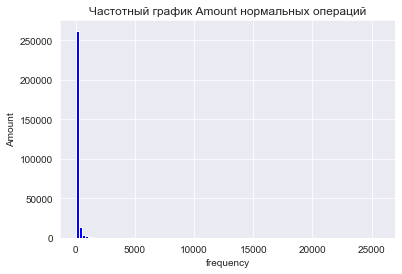

In [5]:
fraud_sum = fraud['Amount'].sum()
fair_sum = fair['Amount'].sum()

print(f'В обманных операциях использовано {fraud_sum}')
print(f'В нормальных операциях использовано {fair_sum}')


n, bins, patches = plt.hist(fraud['Amount'], 100, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Amount')
plt.title('Частотный график Amount обманных операций')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(fair['Amount'], 100, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Amount')
plt.title('Частотный график Amount нормальных операций')
plt.grid(True)
plt.show()



# 5. 
**Построить графики histograms для всех значений**

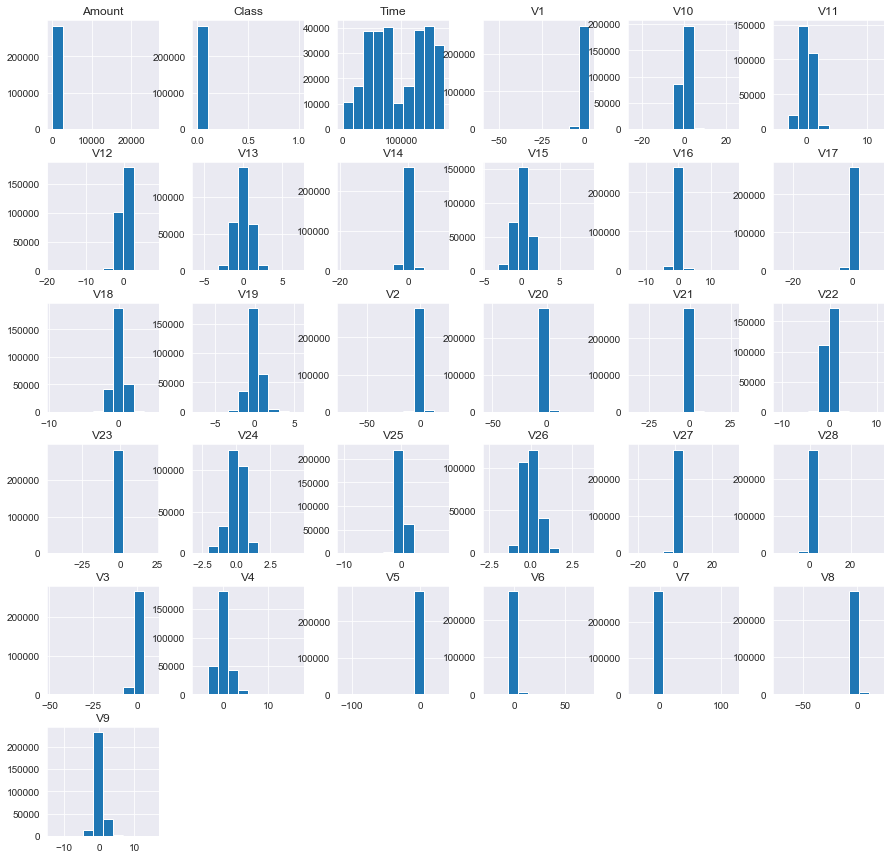

In [7]:
df.hist(figsize=(15,15))
plt.show()

# 6. 
**Построить матрицу корреляций для всех значений**

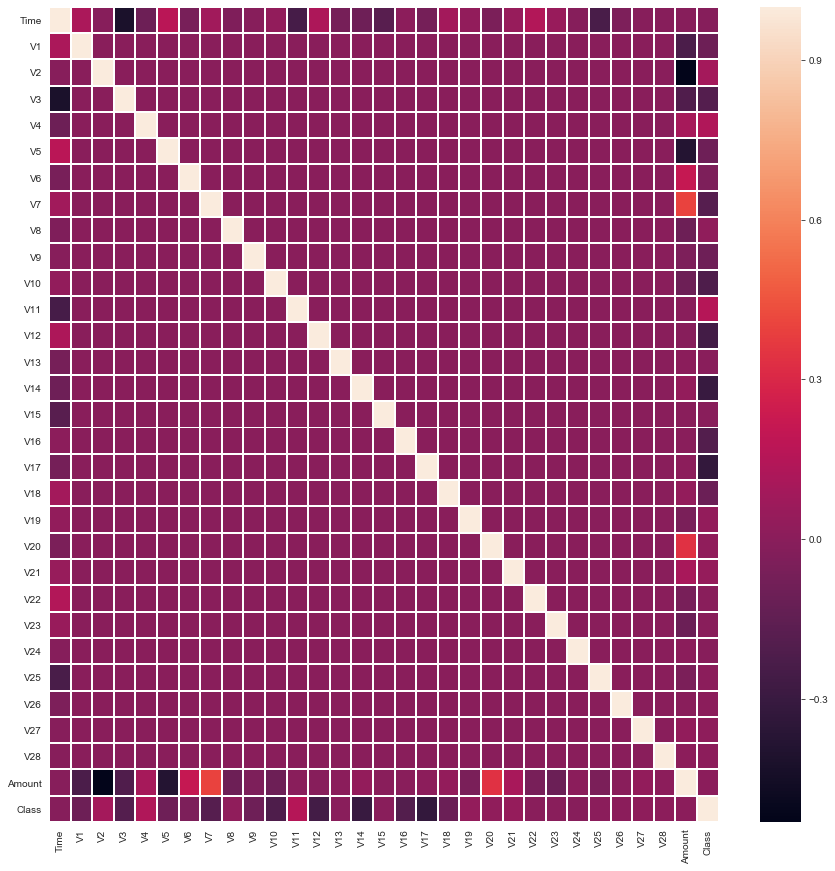

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=1, ax=ax)

# 7.
**Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [9]:
#В качестве факторов выберем наиболее коррелирующие с Class параметры.

y = df.Class
X = df[['V10', 'V12', 'V14', 'V16', 'V17']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
model_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred))

from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,model_pred)
print('Точность предсказания модели: ', accuracy)

C:\Users\Olga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.54      0.66        98

    accuracy                           1.00     56962
   macro avg       0.93      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Точность предсказания модели:  0.9990519995786665


Практически 100% точность предсказания модели объясняется несбалансированностью данных. В исходном датесете доля фродовых операции менее 1%.

При этом точность системы невысокая: из всех элементов, которые система отнесла к  1 классу лишь 85% элементов  - действительно 1й класс.
Полнота системы также низкая : классификатор нашел лишь 54% фродовых операций.
f1-score для класса 1 составляет 0,66.

# 8. 
**Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистической регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [10]:
from sklearn.utils import resample

# создадим вектор N как общие данные (X и Y)
N = pd.concat([X_train, y_train], axis=1)

# разделим на 2 класса - fraud и fair
fair = N[N.Class==0]
fraud = N[N.Class==1]

# уменьшаем выборку c бОльшим количеством элементов
fair_downsampled = resample(fair,
                                replace = False, 
                                n_samples = len(fraud),
                                random_state = 42) 

# объединим полученные данные с меньшей выборкой
N_downsampled = pd.concat([fair_downsampled, fraud])

# проверим количество
N_downsampled.Class.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [11]:
y_train = N_downsampled.Class
X_train = N_downsampled.drop('Class', axis=1)

N_downsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

N_downsampled_pred = N_downsampled.predict(X_test)

print(classification_report(y_test, N_downsampled_pred))

accuracy = accuracy_score(y_test,N_downsampled_pred)
print('Точность предсказания модели: ', accuracy)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.88      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Точность предсказания модели:  0.9807064358695271


Качество модели ухудшилось по всем параметрам,кроме recall. Полнота системы улучшилась - 88% фродовых операций идентифицировались системой.
Вероятно, снижение качества модели оусловлено сокращением количества наблюдений. Полученного объема данных  не достаточно для качественного обучения модели.

# 9. 
**Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [12]:
# Делим колонку Class на 2
one_hot_Class = pd.get_dummies(df['Class'])

# Осталяем признаки, которые использовались в логистической регрессии
#df = df[['V10', 'V12', 'V14', 'V16', 'V17']]

# Удалим колонку Class
df = df.drop('Class',axis = 1)

# Присоединяем 2 новых колонки.
df = df.join(one_hot_Class)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,0,1
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0


In [15]:
output_y = df.iloc[:,30:]
input_x = df.iloc[:,:30]

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

0    284315
1       492
dtype: int64


In [17]:
#Выделим из датасета тренировочные и тестовые данные.

from sklearn.model_selection import train_test_split
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(input_x, output_y, test_size=0.2)

No handles with labels found to put in legend.


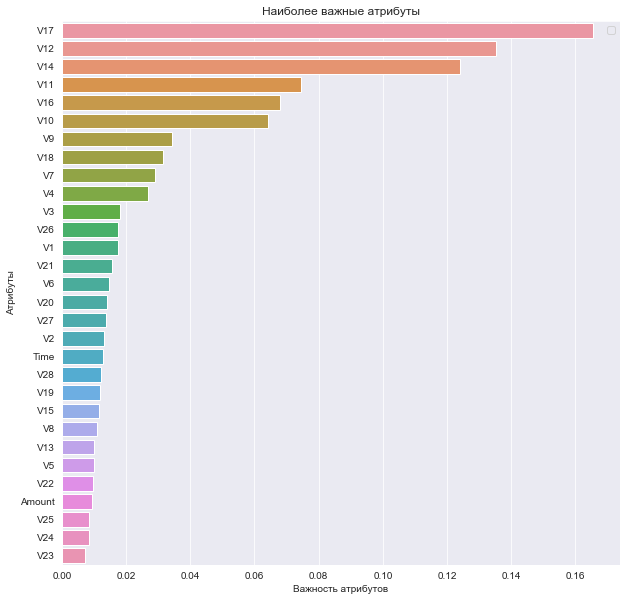

In [18]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_30,y_train_30)

headers = list(X_train_30.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [19]:
model.score(X_test_30, y_test_30)

0.9994733330992591

При построении логистической регрессии в качестве факторов были приняты наиболее важные в дереве решений, кроме V11.

Псчитаем модель дерева решений по признакам, использованным при пострроении логистической регрессии.

In [24]:
# Осталяем признаки, которые использовались в логистической регрессии
df = df[['V10', 'V12', 'V14', 'V16', 'V17']]

df = df.join(one_hot_Class)
df.head()

,V10,V12,V14,V16,V17,0,1
0,0.090794,-0.617801,-0.311169,-0.470401,0.207971,1,0
1,-0.166974,1.065235,-0.143772,0.463917,-0.114805,1,0
2,0.207643,0.066084,-0.165946,-2.890083,1.109969,1,0
3,-0.054952,0.178228,-0.287924,-1.059647,-0.684093,1,0
4,0.753074,0.538196,-1.119670,-0.451449,-0.237033,1,0


In [21]:
output_y4 = df.iloc[:,5:]
input_x4 = df.iloc[:,:5]

In [22]:
from sklearn.model_selection import train_test_split
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(input_x4, output_y4, test_size=0.2)

No handles with labels found to put in legend.


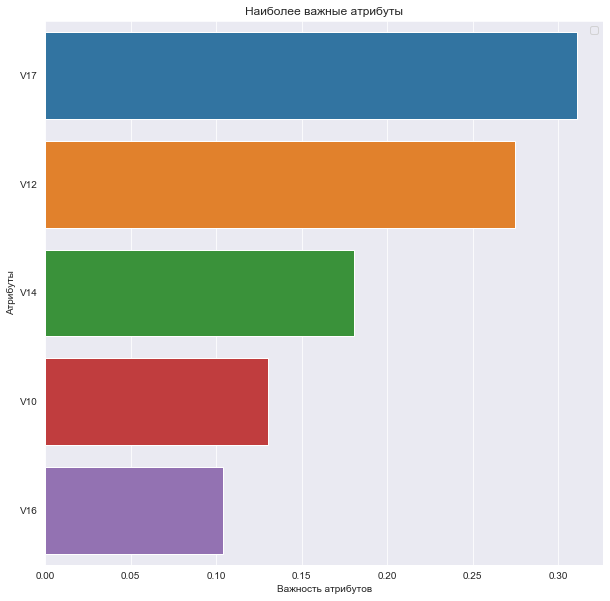

In [23]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model_4=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_4.fit(X_train_4,y_train_4)

headers = list(X_train_4.columns.values)

feature_imp = pd.Series(model_4.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [25]:
model_4.score(X_test_4, y_test_4)

0.9996664442961974

Точноть предсказания модели Дерево решений также близка к 100% и сравнима с рещультатами модели логистической регрессии также по причине несбалансированности данных.